In [ ]:
# Standar libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os

%matplotlib widget

# Set the Directories

In [24]:
dirResults = "./EPM_3980_Results_piv16x16/"
extension = 'npz'

if not os.path.exists(dirResults):
    print("Unknown directory" )
else:
    files = os.listdir(dirResults)
    files = sorted([i for i in files if i.endswith(extension)])
    print(files)

['gpu_field_000.npz', 'gpu_field_001.npz', 'gpu_field_002.npz']


# Load the PIV data

In [29]:
#Load PIV results
Data = np.load(dirResults+'gpu_field_002.npz')
x = Data['x']
y = Data['y']
u = Data['u']
v = Data['v']

# Plot Velocity Vectors


Text(0, 0.5, 'y (pixels)')

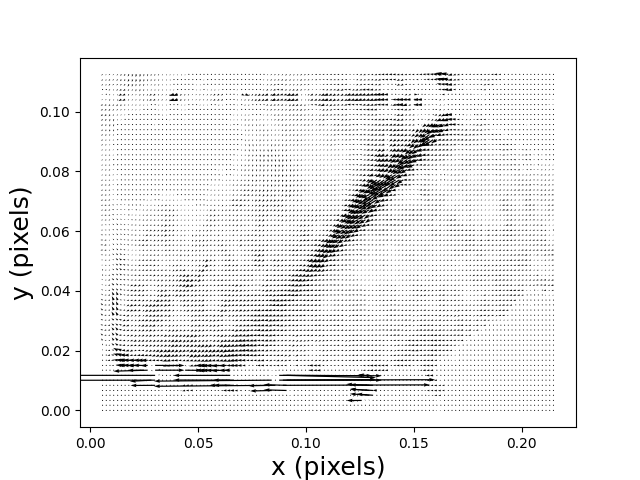

In [ ]:
fig, ax1 = plt.subplots()
ax1.quiver(x, y, u, v, scale=1 )
ax1.set_xlabel('x (pixels)',fontsize=18)
ax1.set_ylabel('y (pixels)',fontsize=18)

# Plot Velocity magnitude

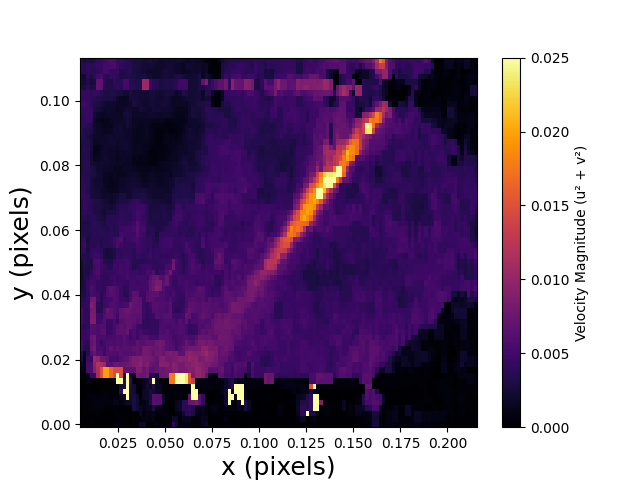

In [38]:
velocity_magnitude = np.sqrt(u**2 + v**2)
vmin = 0
  # Set your desired minimum value
vmax = 0.025#velocity_magnitude.max() # Or set a custom maximum value

fig2, ax = plt.subplots()
c = ax.pcolormesh(x, y, velocity_magnitude, shading='auto', cmap='inferno', vmin=vmin, vmax=vmax)
fig2.colorbar(c, ax=ax, label='Velocity Magnitude (u² + v²)')
ax.set_xlabel('x (pixels)', fontsize=18)
ax.set_ylabel('y (pixels)', fontsize=18)
plt.show()

In [36]:
# Define box corners
x1, y1 = 0.1281, 0.078  # upper left corner (change as needed)
x2, y2 = 0.1403, 0.0675  # lower right corner (change as needed)

# Create mask for points inside the box
mask = (x >= x1) & (x <= x2) & (y <= y1) & (y >= y2)

# Calculate mean of u inside the box
mean_u = np.mean(velocity_magnitude[mask])
print(f"Mean u inside the box: {mean_u}")

Mean u inside the box: 0.01787492446601391


In [35]:
velocity_magnitude[mask]

array([], dtype=float32)

In [13]:
(x >= x1)

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])